In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [2]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


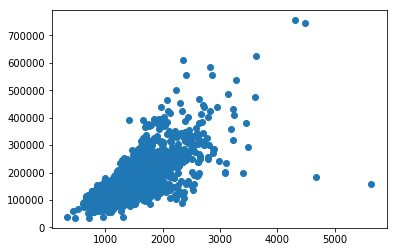

In [4]:
fig,ax=plt.subplots()
ax.scatter(x=df['GrLivArea'],y=df['SalePrice'])

In [5]:
'''Removing Outliers'''
df=df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<30000)].index)

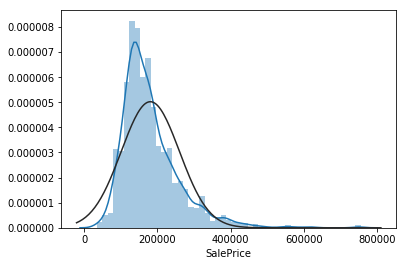

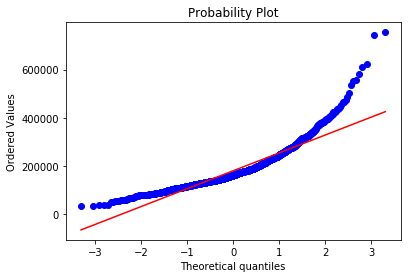

In [6]:
def checkskew(cols):
    sns.distplot(df[cols],fit=norm)
    fig=plt.figure()
    res=stats.probplot(df[cols],plot=plt)
    (mu,sigma)=norm.fit(df[cols])
    
checkskew('SalePrice')

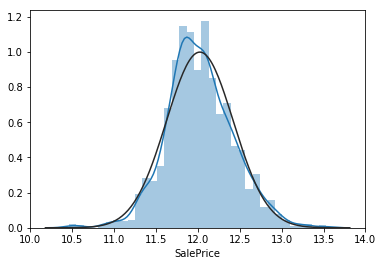

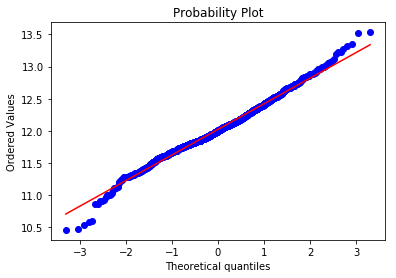

In [7]:
df['SalePrice']=np.log1p(df['SalePrice'])
checkskew('SalePrice')

In [8]:
y=df['SalePrice'].values
xdf=df.drop(['SalePrice'],axis=1)
all_data=pd.concat((xdf,test)).reset_index(drop=True)
all_data.shape

(2919, 79)

In [9]:
alldatana=(all_data.isnull().sum()/len(all_data))*100
alldatana = alldatana.drop(alldatana[alldatana == 0].index).sort_values(ascending=False)

(2919, 79)

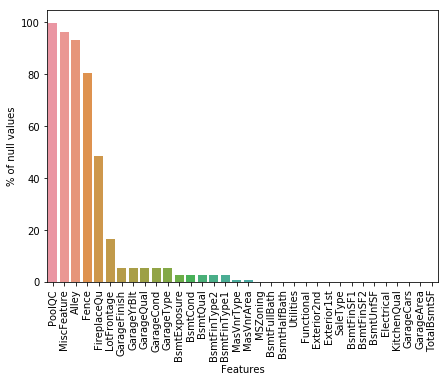

In [10]:
fig,ax=plt.subplots(figsize=(7,5))
sns.barplot(alldatana.index,alldatana)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.xlabel('Features')
plt.ylabel('% of null values')
all_data.shape

In [11]:
'''Handling missing data values'''
d=all_data[all_data['PoolQC'].notnull()]
d['PoolQC']

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
1974    Ex
2573    Ex
2710    Gd
Name: PoolQC, dtype: object

In [12]:
all_data['PoolQC']=all_data['PoolQC'].fillna("None")
all_data['MiscFeature']=all_data['MiscFeature'].fillna("None")
all_data['Alley']=all_data['Alley'].fillna("None")
all_data['Fence']=all_data['Fence'].fillna("None")
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna("None")
all_data.shape

(2919, 79)

In [13]:
all_data['LotFrontage']=all_data.groupby("Neighborhood")['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [14]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

In [15]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [16]:
for col in ("MasVnrArea",'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('MSSubClass','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType"):
    all_data[col] = all_data[col].fillna('None')
all_data.shape

(2919, 79)

In [17]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [18]:
all_data = all_data.drop(['Utilities'], axis=1)

In [19]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data.shape

(2919, 78)

In [20]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
all_data.shape

(2919, 78)

In [21]:
all_data["MSSubClass"]=all_data["MSSubClass"].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [22]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data.shape

(2919, 78)

In [23]:
all_data['Totalsf']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

In [24]:
skewness=all_data.skew().sort_values(ascending=False)
skewness.shape

(59,)

In [25]:
skewness=skewness[abs(skewness)>0.75]
from scipy.special import boxcox1p
skew_features=skewness.index
lam=0.15
for col in skew_features:
    all_data[col]=boxcox1p(all_data[col],lam)

In [26]:
all_data = pd.get_dummies(all_data)
train=all_data[:xdf.shape[0]]
test=all_data[xdf.shape[0]:]
all_data.shape

(2919, 221)

In [27]:
n_folds = 5
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [28]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.4, kernel='polynomial', degree=1, coef0=16.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score:",score.mean())

Kernel Ridge score: 0.1296491082867957


In [29]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score:",score.mean())

Lasso score: 0.12383318065608102


In [30]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: ",score.mean())

Gradient Boosting score:  0.12317150057466644


In [31]:
LassoMd = lasso.fit(train.values,y)
KRRMd = KRR.fit(train.values,y)
GBoostMd = GBoost.fit(train.values,y)

In [32]:
finalMd = (np.expm1(LassoMd.predict(test.values))+ np.expm1(KRRMd.predict(test.values)) + np.expm1(GBoostMd.predict(test.values)) ) / 3
finalMd

array([117964.14169984, 152986.76906067, 184324.24598847, ...,
       168791.45669425, 118896.95958954, 224937.63452694])

In [34]:
from sklearn.ensemble import RandomForestRegressor
regg=RandomForestRegressor(n_estimators=3000,random_state=5)

score = rmsle_cv(regg)
print("Random Forest score: ",score.mean())

Random Forest score:  0.14214762712869583
